<a href="https://colab.research.google.com/github/BinayakKoirala/Stoke-Analysis-and-Machine-Learning/blob/main/2_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('brain_stroke.csv')
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


# Data Preprocessing

Checking null values

In [ ]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Viewing the presence of outliers using box-plot.

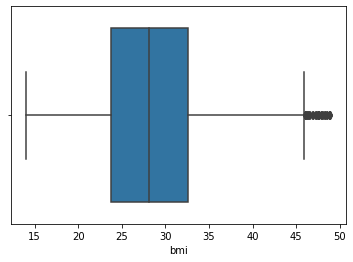

In [ ]:
sns.boxplot(x='bmi',data=data)

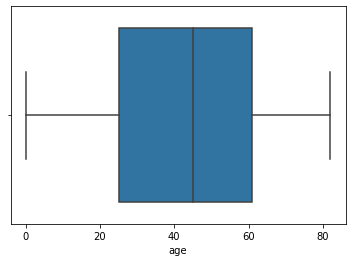

In [ ]:
sns.boxplot(x='age',data=data)

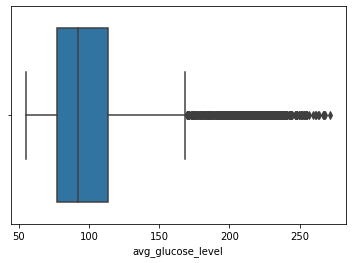

In [ ]:
sns.boxplot(x='avg_glucose_level',data=data)

## Imbalanced Data

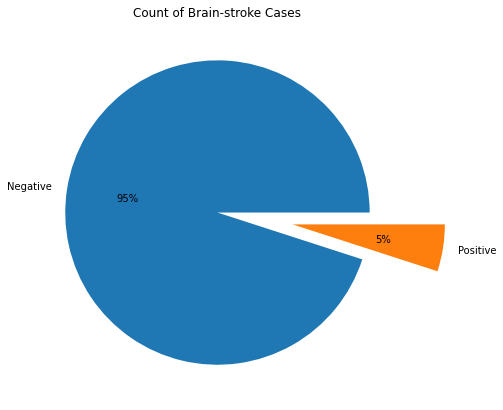

In [ ]:
plt.figure(figsize=(7,7))
plt.pie(data['stroke'].value_counts(),labels=['Negative','Positive'], autopct='%1.0f%%',explode=[0,0.5])
plt.title("Count of Brain-stroke Cases")
plt.show()

Here, only 5% of the data has positive case. The data is highly imbalanced and under-sampled.

We have to make the data balanced by under-sampling the majority class.( i.e. negative )

In [ ]:
neg_data=data[data.stroke==0]
pos_data=data[data.stroke==1]

print(pos_data.shape)
print(neg_data.shape)

(248, 11)
(4733, 11)


Under-Sampling the positive cases

In [ ]:
sample=neg_data.sample(frac=0.06,replace=True)

sample.shape

(284, 11)

In [ ]:
balanced_data=pd.concat([sample,pos_data],ignore_index=True,sort=False)
balanced_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,58.0,1,0,Yes,Private,Rural,106.27,28.6,never smoked,0
1,Male,43.0,0,0,No,Private,Urban,78.98,31.3,formerly smoked,0
2,Male,31.0,0,0,No,Private,Rural,95.62,32.0,smokes,0
3,Female,43.0,0,0,Yes,Govt_job,Rural,70.08,26.6,never smoked,0
4,Female,12.0,0,0,No,children,Rural,108.63,23.4,never smoked,0


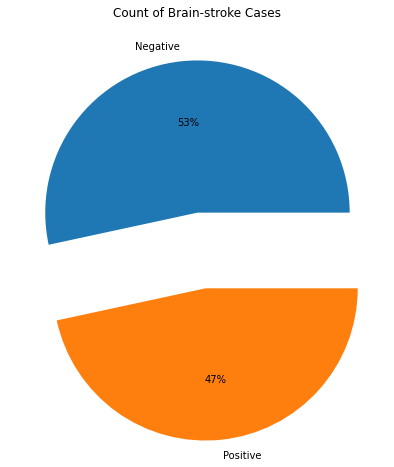

In [ ]:
plt.figure(figsize=(7,7))
plt.pie(balanced_data['stroke'].value_counts(),labels=['Negative','Positive'], autopct='%1.0f%%',explode=[0,0.5])
plt.title("Count of Brain-stroke Cases")
plt.show()

Now, the data is balanced.

## Data Normalization

For Data Normalization, we will use z-score method (or Normal Distribution ).
By this we make the data of mean 0 and standard deviation 1.

For this, we have to subtract data by mean and divide it by standard deviation.

In [ ]:
## for age
a=balanced_data['age'].mean()
b=balanced_data['age'].std()

balanced_data['age']=(balanced_data['age']-a)/b

balanced_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,0.160119,1,0,Yes,Private,Rural,106.27,28.6,never smoked,0
1,Male,-0.509029,0,0,No,Private,Urban,78.98,31.3,formerly smoked,0
2,Male,-1.044347,0,0,No,Private,Rural,95.62,32.0,smokes,0
3,Female,-0.509029,0,0,Yes,Govt_job,Rural,70.08,26.6,never smoked,0
4,Female,-1.891935,0,0,No,children,Rural,108.63,23.4,never smoked,0


In [ ]:
## for bmi
a=balanced_data['bmi'].mean()
b=balanced_data['bmi'].std()

balanced_data['bmi']=(balanced_data['bmi']-a)/b

balanced_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,0.160119,1,0,Yes,Private,Rural,106.27,-0.127849,never smoked,0
1,Male,-0.509029,0,0,No,Private,Urban,78.98,0.307632,formerly smoked,0
2,Male,-1.044347,0,0,No,Private,Rural,95.62,0.420535,smokes,0
3,Female,-0.509029,0,0,Yes,Govt_job,Rural,70.08,-0.450428,never smoked,0
4,Female,-1.891935,0,0,No,children,Rural,108.63,-0.966554,never smoked,0


In [ ]:
## for average glucose level
a=balanced_data['avg_glucose_level'].mean()
b=balanced_data['avg_glucose_level'].std()

balanced_data['avg_glucose_level']=(balanced_data['avg_glucose_level']-a)/b

balanced_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,0.160119,1,0,Yes,Private,Rural,-0.238417,-0.127849,never smoked,0
1,Male,-0.509029,0,0,No,Private,Urban,-0.734375,0.307632,formerly smoked,0
2,Male,-1.044347,0,0,No,Private,Rural,-0.431966,0.420535,smokes,0
3,Female,-0.509029,0,0,Yes,Govt_job,Rural,-0.896120,-0.450428,never smoked,0
4,Female,-1.891935,0,0,No,children,Rural,-0.195527,-0.966554,never smoked,0


## Feature Engineering

Since the data in multiple columns are in categorical format, we have to change it into the numerical format using encoding techniques. 
We will create the dummy columns for the categorical data and set positive if the data is true for the respective row.

In [ ]:
data=balanced_data

# list of columns to create a dummy columns
cols_to_dummies=['gender','ever_married','work_type','Residence_type','smoking_status']

# creating the dummy columns 
df_with_dummies = pd.get_dummies(data, columns=cols_to_dummies, drop_first=True)

# adding the dummy columns to the original data
new_data = pd.concat([data[cols_to_dummies], df_with_dummies], axis=1)

# removing the original columns as the information is restored
new_data.drop(cols_to_dummies,axis=1,inplace=True)

new_data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.160119,1,0,-0.238417,-0.127849,0,1,1,1,0,0,0,0,1,0
1,-0.509029,0,0,-0.734375,0.307632,0,1,0,1,0,0,1,1,0,0
2,-1.044347,0,0,-0.431966,0.420535,0,1,0,1,0,0,0,0,0,1
3,-0.509029,0,0,-0.896120,-0.450428,0,0,1,0,0,0,0,0,1,0
4,-1.891935,0,0,-0.195527,-0.966554,0,0,0,0,0,1,0,0,1,0


In [ ]:
x=new_data.drop(['stroke'],axis=1)
x.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.160119,1,0,-0.238417,-0.127849,1,1,1,0,0,0,0,1,0
1,-0.509029,0,0,-0.734375,0.307632,1,0,1,0,0,1,1,0,0
2,-1.044347,0,0,-0.431966,0.420535,1,0,1,0,0,0,0,0,1
3,-0.509029,0,0,-0.896120,-0.450428,0,1,0,0,0,0,0,1,0
4,-1.891935,0,0,-0.195527,-0.966554,0,0,0,0,1,0,0,1,0


In [ ]:
y=new_data['stroke']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: stroke, dtype: int64

# ML Modelling

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

Splitting the data into the 7:3 ratio for training and testing

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

print("Shape of Training Dataset : ",X_train.shape)
print("Shape of Testing dataset : ",X_test.shape)


Shape of Training Dataset :  (372, 14)
Shape of Testing dataset :  (160, 14)


## Logistic Regression

In [ ]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)

print('Accuracy on training Data: ',lr.score(X_train,y_train))
print('Accuracy on testing Data: ',accuracy_score(y_test,y_pred))


Accuracy on training Data:  0.75
Accuracy on testing Data:  0.8125


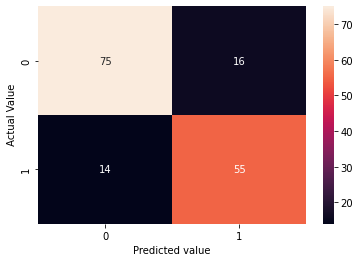

In [ ]:
cm=confusion_matrix(y_test,y_pred)
hm=sns.heatmap(cm,annot=True)
hm.set(xlabel='Predicted value',ylabel=' Actual Value')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        91
           1       0.77      0.80      0.79        69

    accuracy                           0.81       160
   macro avg       0.81      0.81      0.81       160
weighted avg       0.81      0.81      0.81       160



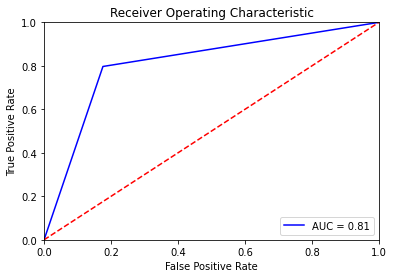

In [ ]:
fpr,tpr,_=roc_curve(y_test,y_pred)
roc=roc_auc_score(y_test,y_pred)

plt.plot(fpr,tpr, 'b', label = 'AUC = %0.2f' % roc)

plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

## KNN

In [ ]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)

print('Accuracy on training Data: ',knn.score(X_train,y_train))
print('Accuracy on testing Data: ',accuracy_score(y_test,y_pred))


Accuracy on training Data:  0.7688172043010753
Accuracy on testing Data:  0.775


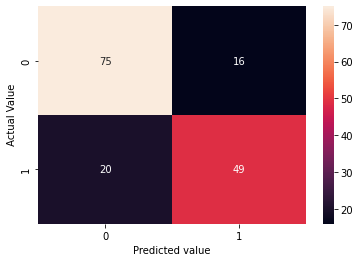

In [ ]:
cm=confusion_matrix(y_test,y_pred)
hm=sns.heatmap(cm,annot=True)
hm.set(xlabel='Predicted value',ylabel=' Actual Value')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81        91
           1       0.75      0.71      0.73        69

    accuracy                           0.78       160
   macro avg       0.77      0.77      0.77       160
weighted avg       0.77      0.78      0.77       160



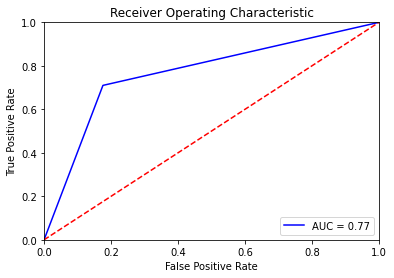

In [ ]:
fpr,tpr,_=roc_curve(y_test,y_pred)
roc=roc_auc_score(y_test,y_pred)

plt.plot(fpr,tpr, 'b', label = 'AUC = %0.2f' % roc)

plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

## Support vector Machine-Classifier

In [ ]:
svc=RandomForestClassifier()
svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

print('Accuracy on training Data: ',svc.score(X_train,y_train))
print('Accuracy on testing Data: ',accuracy_score(y_test,y_pred))


Accuracy on training Data:  1.0
Accuracy on testing Data:  0.78125


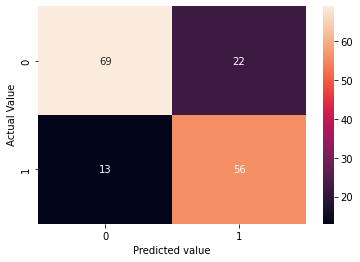

In [ ]:
cm=confusion_matrix(y_test,y_pred)
hm=sns.heatmap(cm,annot=True)
hm.set(xlabel='Predicted value',ylabel=' Actual Value')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80        91
           1       0.72      0.81      0.76        69

    accuracy                           0.78       160
   macro avg       0.78      0.78      0.78       160
weighted avg       0.79      0.78      0.78       160



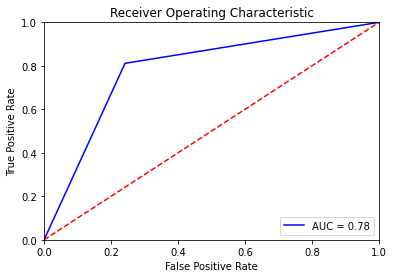

In [ ]:
fpr,tpr,_=roc_curve(y_test,y_pred)
roc=roc_auc_score(y_test,y_pred)

plt.plot(fpr,tpr, 'b', label = 'AUC = %0.2f' % roc)

plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

## Ensembling Methods-(Boosting & Bagging)

### Random Forest Classifier- Bagging

In [ ]:
rfc=RandomForestClassifier()

rfc.fit(X_train,y_train)

y_pred=rfc.predict(X_test)

print('Accuracy on training Data: ',rfc.score(X_train,y_train))
print('Accuracy on testing Data: ',accuracy_score(y_test,y_pred))


Accuracy on training Data:  1.0
Accuracy on testing Data:  0.78125


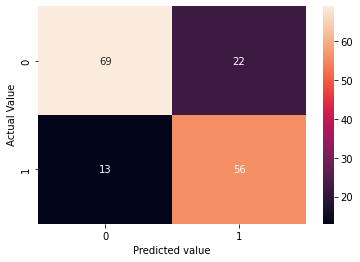

In [ ]:
cm=confusion_matrix(y_test,y_pred)
hm=sns.heatmap(cm,annot=True)

hm.set(xlabel='Predicted value',ylabel=' Actual Value')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80        91
           1       0.72      0.81      0.76        69

    accuracy                           0.78       160
   macro avg       0.78      0.78      0.78       160
weighted avg       0.79      0.78      0.78       160



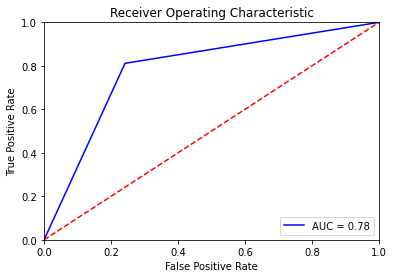

In [ ]:
fpr,tpr,_=roc_curve(y_test,y_pred)
roc=roc_auc_score(y_test,y_pred)

plt.plot(fpr,tpr, 'b', label = 'AUC = %0.2f' % roc)

plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

### Gradient-Boosting

In [ ]:
gbc=GradientBoostingClassifier()

gbc.fit(X_train,y_train)

y_pred=gbc.predict(X_test)

print('Accuracy on training Data: ',gbc.score(X_train,y_train))
print('Accuracy on testing Data: ',accuracy_score(y_test,y_pred))


Accuracy on training Data:  0.9516129032258065
Accuracy on testing Data:  0.7625


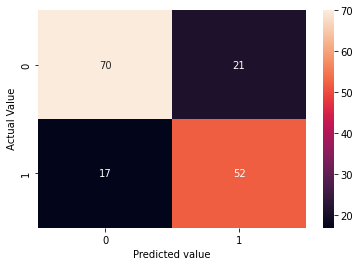

In [ ]:
cm=confusion_matrix(y_test,y_pred)
hm=sns.heatmap(cm,annot=True)

hm.set(xlabel='Predicted value',ylabel=' Actual Value')
plt.show()

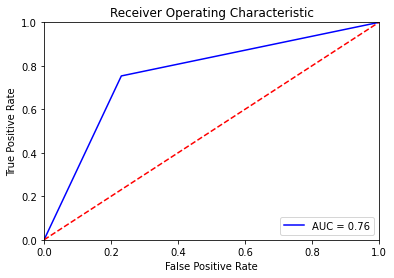

In [ ]:
fpr,tpr,_=roc_curve(y_test,y_pred)
roc=roc_auc_score(y_test,y_pred)

plt.plot(fpr,tpr, 'b', label = 'AUC = %0.2f' % roc)

plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

### Extreme-Gradient(XG) Boosting

In [ ]:
xgbc=XGBClassifier()

xgbc.fit(X_train,y_train)

y_pred=xgbc.predict(X_test)

print('Accuracy on training Data: ',xgbc.score(X_train,y_train))
print('Accuracy on testing Data: ',accuracy_score(y_test,y_pred))


Accuracy on training Data:  0.8978494623655914
Accuracy on testing Data:  0.79375


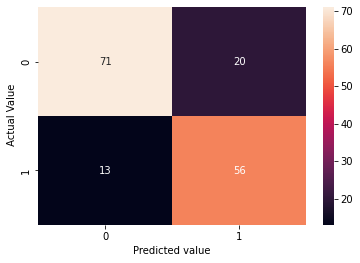

In [ ]:
cm=confusion_matrix(y_test,y_pred)
hm=sns.heatmap(cm,annot=True)

hm.set(xlabel='Predicted value',ylabel=' Actual Value')
plt.show()

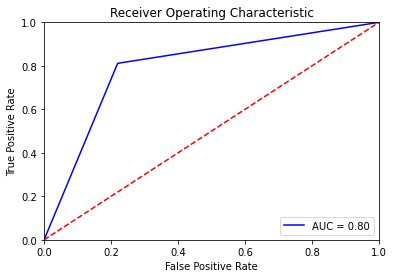

In [ ]:
fpr,tpr,_=roc_curve(y_test,y_pred)
roc=roc_auc_score(y_test,y_pred)

plt.plot(fpr,tpr, 'b', label = 'AUC = %0.2f' % roc)

plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

## Neural Network-(Tensorflow)

In [ ]:
import tensorflow as tf
from tensorflow import keras

from keras import layers, models
from keras.models import Sequential

from keras.layers import Conv2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

from keras.regularizers import l2
from keras.callbacks import EarlyStopping

In [ ]:

model=Sequential()

model.add(Dense(units=64,activation='relu',input_shape=(14,)))
model.add(Dropout(0.5))

model.add(Dense(units=16,activation='relu'))

model.add(Dense(units=8,activation='relu'))
model.add(Dense(units=8,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                960       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,217
Trainable params: 2,217
Non-trainabl

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])
earlystopping=EarlyStopping(patience=10)

In [ ]:
model_log=model.fit(X_train,y_train,
                    epochs=25,
                    steps_per_epoch=20,
                    validation_data=(X_test,y_test),
                    callbacks=[earlystopping],

                    )

Epoch 1/25
20/20 [==============================] - 2s 36ms/step - loss: 0.6855 - accuracy: 0.5108 - val_loss: 0.6680 - val_accuracy: 0.5750
Epoch 2/25
20/20 [==============================] - 0s 10ms/step - loss: 0.6754 - accuracy: 0.5296 - val_loss: 0.6481 - val_accuracy: 0.6500
Epoch 3/25
20/20 [==============================] - 0s 10ms/step - loss: 0.6442 - accuracy: 0.6075 - val_loss: 0.6196 - val_accuracy: 0.6875
Epoch 4/25
20/20 [==============================] - 0s 12ms/step - loss: 0.6261 - accuracy: 0.6263 - val_loss: 0.5941 - val_accuracy: 0.7375
Epoch 5/25
20/20 [==============================] - 0s 12ms/step - loss: 0.5987 - accuracy: 0.6801 - val_loss: 0.5643 - val_accuracy: 0.7812
Epoch 6/25
20/20 [==============================] - 0s 15ms/step - loss: 0.5828 - accuracy: 0.7285 - val_loss: 0.5464 - val_accuracy: 0.7875
Epoch 7/25
20/20 [==============================] - 0s 8ms/step - loss: 0.5738 - accuracy: 0.7177 - val_loss: 0.5334 - val_accuracy: 0.7812
Epoch 8/25
20/

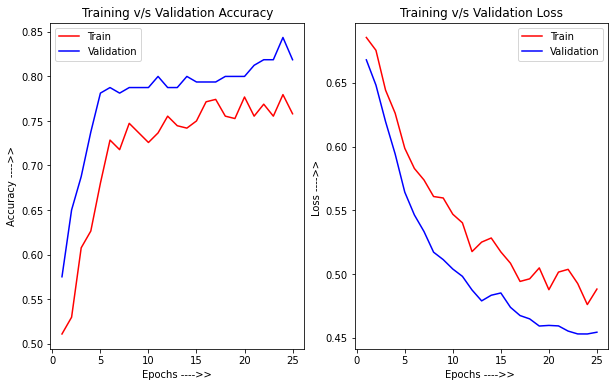

In [ ]:
acc=model_log.history['accuracy']
val_acc=model_log.history['val_accuracy']
loss=model_log.history['loss']
val_loss=model_log.history['val_loss']
epochs=range(1,len(acc)+1)

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(epochs,acc,label='Training Accuracy ',color='r')
plt.plot(epochs,val_acc,label='Validation Accuracy',color='b')
plt.xlabel('Epochs ---->>')
plt.ylabel('Accuracy ---->>')
plt.legend(['Train','Validation'])
plt.title("Training v/s Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(epochs,loss,label='Training Loss ',color='r')
plt.plot(epochs,val_loss,label='Validation Loss',color='b')
plt.xlabel('Epochs ---->> ')
plt.ylabel('Loss ---->> ')
plt.legend(['Train','Validation'])
plt.title("Training v/s Validation Loss")
plt.show()


plt.show()

The machine Learning models performs well for the dataset. The dataset we have is very small and highly imbalanced.

The accuracy we are getting in training and testing data is good despite of having very less and imbalanced dataset. But the accuracy is not the only metric to monitor the performance of the model.

In this case of Stroke Detection, the model should be choosed with very low false-negative error.
The performance of the model can be determined by various metrics other than accuracy like roc score, roc curve, confusion matrix, classification report.
The correct model can be choosed by analysizing the above mentioned metrics.

# ...........................Thank You............................